<a href="https://colab.research.google.com/github/henselwilson/GuviTask/blob/main/Product_User_prediction_Task5_Wilson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Product User Prediction Analysis

This notebook performs analysis on the 'takehome_users' dataset and the 'takehome_user_engagement' dataset of a product and provides result of the most important factors that affect the future user adoption of the product.
The result and Summary are given at the end of this file.

In [23]:
# Importing the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [24]:
"""
from google.colab import files
uploaded=files.upload()
"""

'\nfrom google.colab import files\nuploaded=files.upload()\n'

In [25]:
#Checking the encoding of the 'takehome_users' file as it throws error for read_csv() function as encoding is not the default 'utf8'

import chardet
with open('/content/drive/MyDrive/GuviTasks/Task5Files/takehome_users.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.7294372453287324, 'encoding': 'ISO-8859-1', 'language': ''}

In [26]:
# Chaninging the default encoding of the file

df1=pd.read_csv('https://raw.githubusercontent.com/henselwilson/GuviTask/main/takehome_users.csv',encoding='ISO-8859-1',index_col='object_id')
df1.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# EDA and Preprocessing

In [27]:
df1[df1.isna().any(axis=1)].count()

creation_time                 7224
name                          7224
email                         7224
creation_source               7224
last_session_creation_time    4047
opted_in_to_mailing_list      7224
enabled_for_marketing_drip    7224
org_id                        7224
invited_by_user_id            1641
dtype: int64

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   name                        12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  8823 non-null   float64
 5   opted_in_to_mailing_list    12000 non-null  int64  
 6   enabled_for_marketing_drip  12000 non-null  int64  
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 937.5+ KB


In [29]:
# Changing the data type of 'Creation_time' to datetime64
df1['creation_time']=df1['creation_time'].astype('datetime64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   name                        12000 non-null  object        
 2   email                       12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   last_session_creation_time  8823 non-null   float64       
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 937.5+ KB


In [30]:
# Converting the 'Last_session_creation_time' to datetime64 format

df1['last_session_creation_time']=pd.to_datetime(df1['last_session_creation_time'], unit='s')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   name                        12000 non-null  object        
 2   email                       12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   last_session_creation_time  8823 non-null   datetime64[ns]
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 937.5+ KB


In [31]:
# Reading the Userlogin Data file

df2=pd.read_csv('https://raw.githubusercontent.com/henselwilson/GuviTask/main/takehome_user_engagement.csv')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [32]:
df2.shape

(207917, 3)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [34]:
# Converting 'time_stamp' column to datetime format

df2['time_stamp']=df2['time_stamp'].astype('datetime64')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


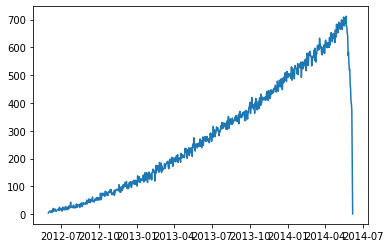

In [35]:
# Creating a data column that contains only the Date patrt of the time_stamp
# Plotting the graph between the date and Logins per day.

df2['date']=df2['time_stamp'].dt.date
users_per_day=df2.groupby('date').count()
users_per_day.reset_index(inplace=True)
plt.plot(users_per_day.date,users_per_day.visited)

(array([2163.,    0., 4254.,    0.,    0., 2087.,    0., 2111.,    0.,
        1385.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

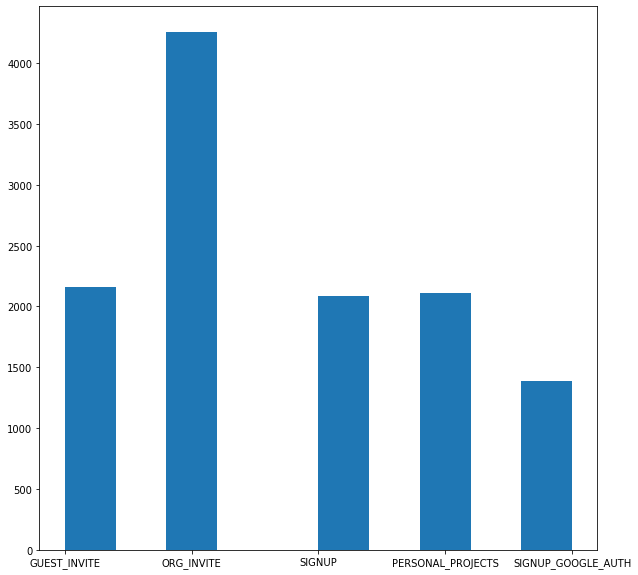

In [36]:
# Plotting to identify the trends in the highest contributor/source to signing up users

plt.figure(figsize=(10,10))
plt.hist(df1.creation_source)

In [37]:
"""
adopted_user=[]
from datetime import datetime, timedelta
for user in range(1,12001):
  if user not in df2.values:
    continue
  temp=df2.loc[df2['user_id']==user]
  temp['usage']=temp['date'].diff(periods=2)
  temp['usage']=temp['usage'].fillna(timedelta(days=10))
  if temp.usage.dt.days.min()<7:
    adopted_user.append(user)
len(adopted_user)
"""

"\nadopted_user=[]\nfrom datetime import datetime, timedelta\nfor user in range(1,12001):\n  if user not in df2.values:\n    continue\n  temp=df2.loc[df2['user_id']==user]\n  temp['usage']=temp['date'].diff(periods=2)\n  temp['usage']=temp['usage'].fillna(timedelta(days=10))\n  if temp.usage.dt.days.min()<7:\n    adopted_user.append(user)\nlen(adopted_user)\n"

In [38]:
# This code below creates a dataframe and groups entries with same user_id and then resets the index so that further operations can be performed. 
# The difference of date between entries 2 periods apart is taken and added to a new column.
# The data is again grouped by user_id and then the minimum of this value is checked if it below 7 days. If it is less than 7 days the user_id is added to a list of adopted_users

usage_data=df2.groupby(['user_id','date']).count()
usage_data.reset_index(inplace=True)
usage_data['usage']=usage_data.date.diff(periods=2).abs()
Min_usage_data=pd.DataFrame(usage_data.groupby('user_id').usage.min().dt.days)
Min_usage_data.reset_index(inplace=True)
adopted_users=list(Min_usage_data[Min_usage_data.usage<7].user_id)

In [39]:
len(adopted_users)

1802

In [40]:
# The adopted users data collected from the 'takehome_users_engagement' dataset is linked to the object_id column of the 'takehome_users' data.
# If the object id is in the list of adpted_users the 'adopted_user' colum if give value 1 else it is 0.

df1['adopted_user']=0
df1.loc[adopted_users,'adopted_user']=1

In [41]:
# The Creation source is converted from object to numerical data.

creation_val={'ORG_INVITE':1,'GUEST_INVITE':2,'PERSONAL_PROJECTS':3,'SIGNUP':4,'SIGNUP_GOOGLE_AUTH':5}
df1['creation_source']=df1['creation_source'].apply(lambda x : creation_val[x])
df1

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2,2014-04-22 03:53:30,1,0,11,10803.0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,316.0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,1525.0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,2,2013-05-22 08:09:28,0,0,1,5151.0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,2,2013-01-22 10:14:20,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,1,2013-09-06 06:14:15,0,0,89,8263.0,0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,5,2013-01-15 18:28:37,0,0,200,NaN,0
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,2,2014-04-27 12:45:16,1,1,83,8074.0,0


In [42]:
"""
from sklearn.preprocessing import StandardScaler
funcn=StandardScaler()
func.fit_transform(X)
stand_df1=df1.copy()
stand_df1[]
"""

'\nfrom sklearn.preprocessing import StandardScaler\nfuncn=StandardScaler()\nfunc.fit_transform(X)\nstand_df1=df1.copy()\nstand_df1[]\n'

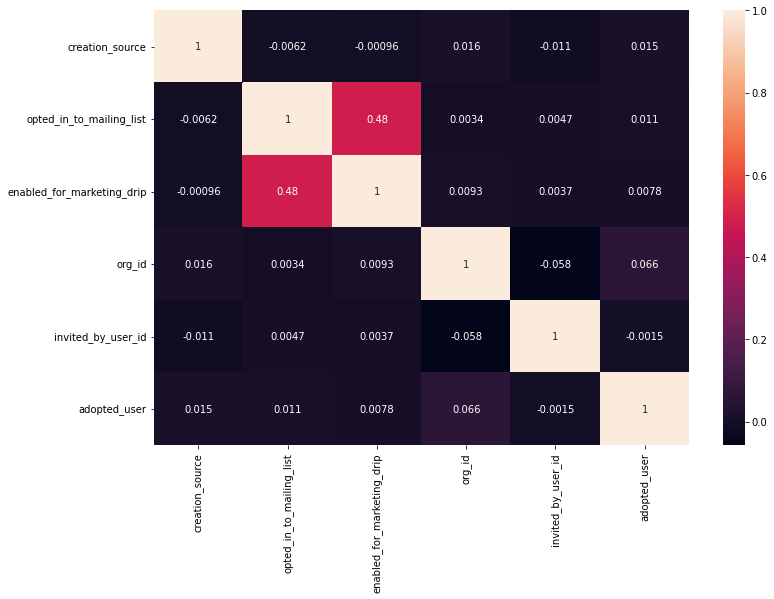

In [43]:
# The correlation heatmap of the numerical column is plotted to find out the relation between all the features and Output - Adopted_user
# The correlation values seem very low which may mean the data might not be linear

import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)

In [98]:
# Importing the necessary ML modules

from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
kfold=KFold(n_splits=10)

X=df1.iloc[:,[3,5,6,7]].values
Y=df1.iloc[:,9].values
print(X)
print(Y)

[[ 2  1  0 11]
 [ 1  0  0  1]
 [ 1  0  0 94]
 ...
 [ 2  1  1 83]
 [ 3  0  0  6]
 [ 4  0  1  0]]
[0 1 0 ... 0 0 0]


In [45]:
# Training and testing the data with different models by K-fold cross validation

clf_models=[KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=2),LogisticRegression(),svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),svm.SVC(kernel='poly')]
kfold=KFold(n_splits=10)
scores=[]
for model in clf_models:
  scores.append(cross_val_score(model,X,Y,cv=kfold,scoring='accuracy').mean())
scores

[0.8114166666666666,
 0.8336666666666666,
 0.8498333333333333,
 0.8498333333333333,
 0.8498333333333333,
 0.8498333333333333]

# Observation and Conclusion

   The analysis of the Datasets provided has been completed. 
   These Data sets contain information about the users of a product, their first login and usage details and other such details.


  This dataset has certain null Values under the invited_by Column and the last_session_creation column, but these null values don't affect the output in any way.


  The output i.e. Adopted user had to be processed from the 'takehome_user_engagement' dataset. The regular users who log into the product on 3 different days within a 7day period come under this category. This was calculated by taking the difference of login period of a user in two alternate logins.

  The users with this period lower than 7days atleast once were labeled as adopted users. 

  I changed the Categorical object values of creation_source to numerical values.

  Exploratory Data Analysis was done on the features. The correlation heatmap was plotted and the correlation values were observed to be extremely low. This could be because the data could be non linearly distributed. 

  I imported the necessary ML models and performed cross validation of different models such as Logistic Regression, Knearest neighbors, Support Vctor Machine.

  I ran KFold cross validation with 10 segments and got the best accuracy score as 84.9833 for Logistic Regression and SVM with different kernels.

